# Spam Email classification using Naive Bayes and Random Forest

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_extraction
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('combined_data.csv')
df

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


In [3]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
df.shape

(83448, 2)

In [6]:
labels={0:'Not Spam',1:'Spam'}
label_counts=df['label'].value_counts()
label_counts

1    43910
0    39538
Name: label, dtype: int64

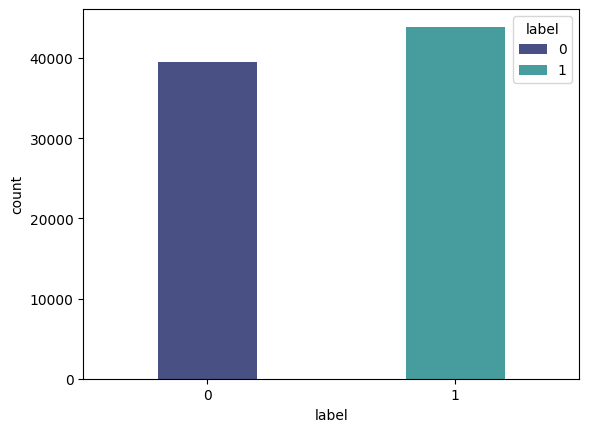

In [7]:
sns.countplot(x='label',data=df,palette='mako',hue='label',width=0.4)
plt.show()

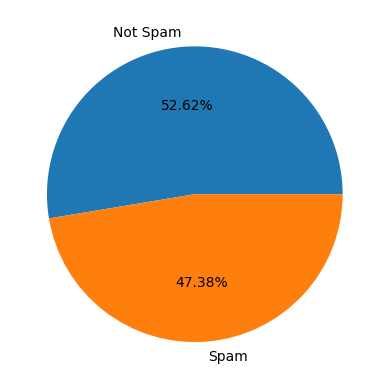

In [8]:
plt.pie(label_counts,labels=labels.values(),autopct="%.2f%%")
plt.show()

In [9]:
df.groupby(df['label']).describe()

text                                                               
       count unique                                                top freq
label                                                                      
0      39538  39538   computer connection from cnn com wednesday es...    1
1      43910  43910  ounce feather bowl hummingbird opec moment ala...    1

In [10]:
df.isna().sum()

label    0
text     0
dtype: int64

In [11]:
df.duplicated().sum()

0

# Model Building

In [12]:
X=df.drop('label',axis=1).values
y=df['label'].values

In [13]:
X.shape,y.shape

((83448, 1), (83448,))

In [14]:
X

array([['ounce feather bowl hummingbird opec moment alabaster valkyrie dyad bread flack desperate iambic hadron heft quell yoghurt bunkmate divert afterimage'],
       ["wulvob get your medircations online qnb ikud viagra escapenumber escapenumber levitra escapenumber escapenumber cialis escapenumber escapenumber imitrex escapenumber escapenumber flonax escapenumber escapenumber ultram escapenumber escapenumber vioxx escapenumber escapenumber ambien escapenumber escapenumber valium escapenumber escapenumber xannax escapenumber escapenumber soma escapenumber meridia escapenumber escapenumber escapenumber escapenumber cysfrt have you ever stopped to wonder how much an average man pays for his mediecines ap painkillers drugs to improve the quality of life weight reducing tablets and many more escapenumber what's worse the same mediucine costs a lot more if it is branded rfwur are you intrested so http dmvrwm remunerativ net dfuaeirxygiq visit our website escapenumber"],
       [" computer

In [15]:
vectorizer = feature_extraction.text.CountVectorizer()

In [16]:
X=vectorizer.fit_transform(X.reshape(-1))

In [17]:
len(vectorizer.get_feature_names_out())

310813

In [18]:
X.shape

(83448, 310813)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

# MultinomialNB

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
model=MultinomialNB()

In [22]:
model.fit(X,y)

MultinomialNB()

In [23]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [33]:
accuracy=accuracy_score(y_test,y_pred)

In [34]:
accuracy

0.9815857799081287

In [35]:
confusion=confusion_matrix(y_test,y_pred)
confusion

array([[11706,   156],
       [  305, 12868]], dtype=int64)

In [36]:
classification=classification_report(y_test,y_pred)

In [41]:
print(classification)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11862
           1       0.99      0.98      0.98     13173

    accuracy                           0.98     25035
   macro avg       0.98      0.98      0.98     25035
weighted avg       0.98      0.98      0.98     25035



<AxesSubplot:>

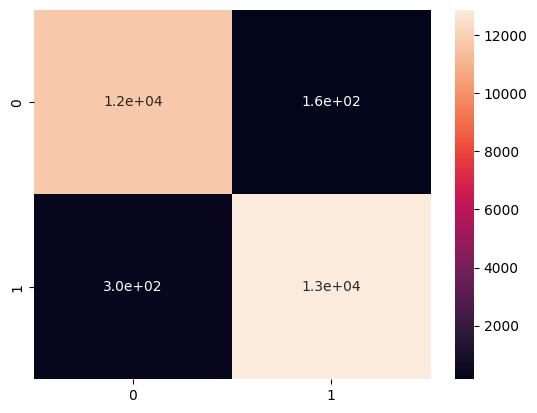

In [42]:
sns.heatmap(confusion,annot=True)

# RandomForestClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model2=RandomForestClassifier(n_estimators=80, criterion='entropy', max_depth=20, min_samples_split=5)

In [46]:
model2.fit(X,y)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=5,
                       n_estimators=80)

In [48]:
y_pred=model2.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [51]:
accuracy1=model2.score(X_test,y_test)
accuracy1

0.9114040343519073

In [52]:
confusion2=confusion_matrix(y_test,y_pred)
confusion2

array([[ 9685,  2177],
       [   41, 13132]], dtype=int64)

In [53]:
classification2=classification_report(y_test,y_pred)

In [54]:
print(classification2)

              precision    recall  f1-score   support

           0       1.00      0.82      0.90     11862
           1       0.86      1.00      0.92     13173

    accuracy                           0.91     25035
   macro avg       0.93      0.91      0.91     25035
weighted avg       0.92      0.91      0.91     25035



<AxesSubplot:>

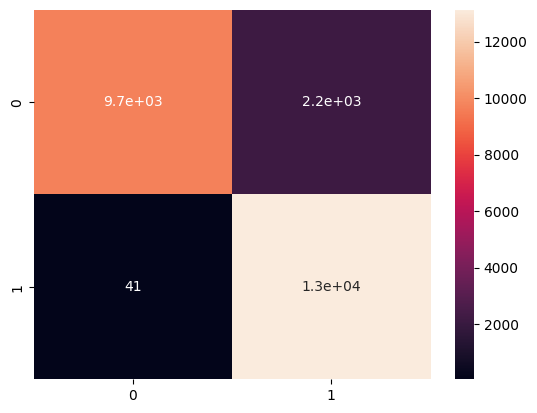

In [55]:
sns.heatmap(confusion2,annot=True)